# Interconnection Queues

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

%load_ext autoreload
%autoreload 2

## NYISO Interconnection Queue

In [2]:
iso = gridstatus.NYISO()
queue = iso.get_interconnection_queue()

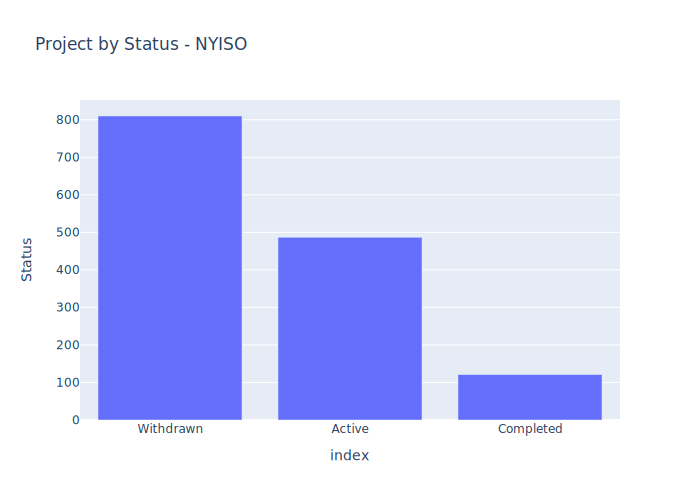

In [3]:
status_distributions = queue["Status"].value_counts()
fig = px.bar(status_distributions, x=status_distributions.index, y="Status", title="Project by Status - NYISO")
fig.show("svg")

## Days in Queue

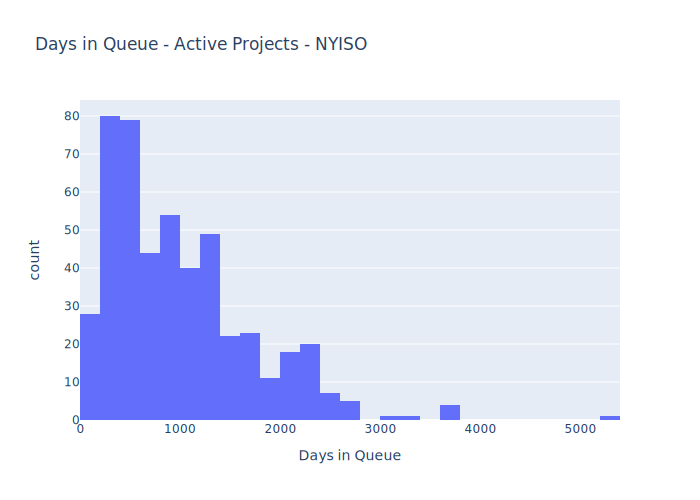

In [4]:
queue["Days in Queue"] = (pd.Timestamp.now() - queue["Queue Date"]).dt.days
active = queue[queue["Status"] == "Active"]
fig = px.histogram(active, x="Days in Queue", title="Days in Queue - Active Projects - NYISO")
fig.show("svg")


## Top project types

In [16]:
generation_types = queue["Generation Type"].value_counts().iloc[:15]
fig = px.bar(generation_types, x=generation_types.index, y="Generation Type", title="Project by Type - NYISO")
fig

In [5]:
queue[queue["Status"] == "Active"]

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),...,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync,Last Update,Z,S,Availability of Studies,FS Complete/ SGIA Tender,Days in Queue
0,0276,Homer Solar Energy Center,"Homer Solar Energy Center, LLC",Cortland,NY,Cortland - Fenner 115kV,NM-NG,Solar,90.0,90.0,...,NaN,NaN,08/2023,09/2023,2022-09-30 00:00:00,C,10.0,"FES, SRIS, FS",2021-02-08 00:00:00,5389.0
1,0386,Grand Isle Intertie,"Vermont Green Line Devco, LLC",Clinton,NY,"Plattsburgh 230kV-New Haven, VT 345kV",NYPA,DC Transmission,400.0,400.0,...,NaN,NaN,12/2023,NaN,2018-11-30 00:00:00,D,6.0,"FES, SIS",NaT,3778.0
2,0393,Berrians East Replacement,"NRG Berrians East Development, LLC",Queens,NY,Astoria East 138kV,ConEd,Dual Fuel,94.2,94.2,...,NaN,NaN,05/2024,08/2024,2022-06-30 00:00:00,J,11.0,"FES, SRIS, FS",2019-07-09 00:00:00,3668.0
3,0396,Baron Winds,"Baron Winds, LLC",Steuben,NY,Hillside - Meyer 230kV,NYSEG,Wind,238.4,238.4,...,NaN,NaN,05/2022,06/2022,2021-11-30 00:00:00,C,11.0,"FES, SRIS, FS",2019-07-09 00:00:00,3623.0
4,0396A,Wood Street Transformer,New York State Electric & Gas,Putnam,NY,Wood St. 345/115kV,NYSEG,AC Transmission,NaN,NaN,...,NaN,NaN,12/2022,NaN,2021-04-30 00:00:00,G,12.0,SIS,NaT,3609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,1408,NY Schodack 634 Knickerbocker Rd Storage,Bluewave Storage Origination LLC,Rensselaer,NY,Schodack - Valkin 115 kV,NM-NG,Energy Storage,57.0,57.0,...,NaN,NaN,09/2023,10/2023,2022-09-30 00:00:00,F,1.0,NaN,NaT,99.0
483,1411,NY Johnstown 378 State Hwy 334 Storage,Bluewave Storage Origination LLC,Fulton,NY,Inghams - Meco 115 kV,NM-NG,Energy Storage,62.5,62.5,...,NaN,NaN,09/2023,10/2023,2022-09-30 00:00:00,F,1.0,NaN,NaT,92.0
484,1417,Russet Ridge Wind,Liberty Renewables Inc.,Livingston,NY,Eelpot Road 115kV,NYSEG,Wind,121.5,121.5,...,NaN,NaN,05/2026,04/2026,2022-09-30 00:00:00,C,1.0,NaN,NaT,74.0
485,1434,NY Interconnection 6,NY Interconnection LLC,Richmond,NY,Goethals - Gowanus 345kV,ConEd,Wind,1050.0,1050.0,...,NaN,NaN,06/2027,06/2027,2022-09-30 00:00:00,J,1.0,NaN,NaT,53.0


In [6]:
queue

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),...,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync,Last Update,Z,S,Availability of Studies,FS Complete/ SGIA Tender,Days in Queue
0,0276,Homer Solar Energy Center,"Homer Solar Energy Center, LLC",Cortland,NY,Cortland - Fenner 115kV,NM-NG,Solar,90.0,90.0,...,NaN,NaN,08/2023,09/2023,2022-09-30 00:00:00,C,10.0,"FES, SRIS, FS",2021-02-08 00:00:00,5389.0
1,0386,Grand Isle Intertie,"Vermont Green Line Devco, LLC",Clinton,NY,"Plattsburgh 230kV-New Haven, VT 345kV",NYPA,DC Transmission,400.0,400.0,...,NaN,NaN,12/2023,NaN,2018-11-30 00:00:00,D,6.0,"FES, SIS",NaT,3778.0
2,0393,Berrians East Replacement,"NRG Berrians East Development, LLC",Queens,NY,Astoria East 138kV,ConEd,Dual Fuel,94.2,94.2,...,NaN,NaN,05/2024,08/2024,2022-06-30 00:00:00,J,11.0,"FES, SRIS, FS",2019-07-09 00:00:00,3668.0
3,0396,Baron Winds,"Baron Winds, LLC",Steuben,NY,Hillside - Meyer 230kV,NYSEG,Wind,238.4,238.4,...,NaN,NaN,05/2022,06/2022,2021-11-30 00:00:00,C,11.0,"FES, SRIS, FS",2019-07-09 00:00:00,3623.0
4,0396A,Wood Street Transformer,New York State Electric & Gas,Putnam,NY,Wood St. 345/115kV,NYSEG,AC Transmission,NaN,NaN,...,NaN,NaN,12/2022,NaN,2021-04-30 00:00:00,G,12.0,SIS,NaT,3609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,583,Fulton,"Erie Boulevard Hydropower, LP",Oswego,NY,Fay St. 34.5kV,NM-NG,Hydro,1.3,1.3,...,NaN,3/31/18,None,None,3/31/18,C,14,FS,2017-07-12 00:00:00,1372.0
117,0696,Swinging Bridge Unit 3,"Eagle Creek Hydro Power, LLC",Orange,NY,Swing Bridge 69 kV,O&R,Hydro,1.2,1.2,...,NaN,2020-04-30 00:00:00,None,None,2020-04-30 00:00:00,G,14,NaN,2018-06-20 00:00:00,1350.0
118,0701,KCE NY 1,"KCE NY 1, LLC",Saratoga,NY,Luther - Forest Substation 34.5kV,NYSEG,Energy Storage,20.0,20.0,...,NaN,2020-04-30 00:00:00,None,None,2020-04-30 00:00:00,F,14,NaN,2018-06-20 00:00:00,1349.0
119,0731,Branscomb Solar,"Branscomb Solar, LLC",Washington,NY,Battenkill - Eastover 115kV,NM-NG,Solar,20.0,20.0,...,NaN,2022-03-31 00:00:00,None,None,2022-03-31 00:00:00,F,14,"FES, SIS, FS",2020-04-29 00:00:00,1331.0


In [7]:
queue[queue["Status"] == "Completed"].to_csv("nyiso_interconnection_queue.csv")


In [8]:
iso.get_generators().to_csv("test.csv")

KeyboardInterrupt: 

In [ ]:
iso = gridstatus.CAISO()


caiso_queue = iso.get_interconnection_queue()
caiso_queue.head(5)

In [ ]:
counts = caiso_queue.groupby("Application Status")["Project Name"].count()
px.bar(counts)
